In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
train_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_x_300_30.npy")
train_data_y = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_y.npy")
test_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\test_x_300_30.npy")

###  using Keras Dense Layer

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Dense(600,input_dim=300, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(400, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data_x, train_data_y,
          epochs=10, shuffle= True,
          batch_size=256, validation_split=0.2)

model.evaluate(train_data_x, train_data_y, batch_size=128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.3840 - acc: 0.8337 - val_loss: 0.3189 - val_acc: 0.8670
Epoch 2/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.3099 - acc: 0.8718 - val_loss: 0.3039 - val_acc: 0.8728
Epoch 3/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.2962 - acc: 0.8791 - val_loss: 0.3006 - val_acc: 0.8776
Epoch 4/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.2908 - acc: 0.8789 - val_loss: 0.2998 - val_acc: 0.8764
Epoch 5/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.2813 - acc: 0.8869 - val_loss: 0.2988 - val_acc: 0.8784
Epoch 6/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.2741 - acc: 0.8891 - val_loss: 0.2983 - val_acc: 0.8788
Epoch 7/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.2689 - acc: 0.8911 - val_loss: 0.3000 - val_acc:

[0.23279401721000673, 0.908400000038147]

### draw ROC curve

In [5]:
from sklearn.metrics import roc_curve
y_pred = model.predict(train_data_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_data_y, y_pred)

In [6]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

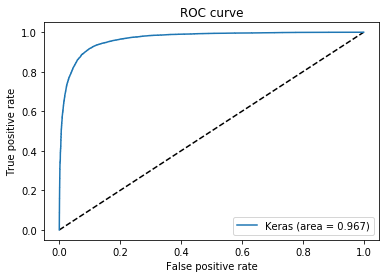

In [13]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### predict test data

In [8]:
# test_data_y = model.predict(test_data_x)

### sava result

In [9]:
# test_id = pd.read_csv('E:\\school\\2-2\\AI\\Project2\\data\\testData.tsv', sep="\t", header=0)

In [10]:
# test_y_path = 'E:\\school\\2-2\\AI\\Project2\\data\\w2vKeras_300_30.csv'

In [11]:
# test_id['sentiment'] = test_data_y

In [12]:
# test_id.to_csv(test_y_path, columns=['id', 'sentiment'], index=0)